**IBM Naan Mudhalvan - Artificial Intelligence**

**Market Basket Analysis**

In [3]:
#packages import
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from mlxtend.frequent_patterns import apriori

In [5]:
#Read the Data
dataset = pd.read_excel("Market_basket_analysis.xlsx")
dataset.head()

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


# New Section

**Data Preparation**

In [6]:
#Data Cleaning
dataset['Description'] = dataset['Itemname'].str.strip()
dataset.dropna(axis=0, subset=['BillNo'], inplace=True)
dataset['BillNo'] = dataset['BillNo'].astype('str')
dataset=dataset[~dataset['BillNo'].str.contains('C')]
dataset.head()

,BillNo,Itemname,Quantity,Date,Price,CustomerID,Country,Description
0,536365,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER
1,536365,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,WHITE METAL LANTERN
2,536365,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,CREAM CUPID HEARTS COAT HANGER
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE
4,536365,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,RED WOOLLY HOTTIE WHITE HEART.


In [ ]:
dataset['Country'].value_counts()


United Kingdom          487622
Germany                   9042
France                    8408
Spain                     2485
Netherlands               2363
Belgium                   2031
Switzerland               1967
Portugal                  1501
Australia                 1185
Norway                    1072
Italy                      758
Sweden                     451
Unspecified                446
Austria                    398
Poland                     330
Japan                      321
Israel                     295
Hong Kong                  284
Singapore                  222
Iceland                    182
USA                        179
Greece                     145
Malta                      112
United Arab Emirates        68
RSA                         58
Lebanon                     45
Lithuania                   35
Brazil                      32
Bahrain                     18
Saudi Arabia                 9
Name: Country, dtype: int64

In [ ]:
dataset.shape


(522064, 8)

In [7]:
#Viewing transaction basket
mybasket = (dataset[dataset['Country'] == "Germany"]).groupby(['BillNo', 'Description'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('BillNo')

In [ ]:
mybasket.head()

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,12 PENCILS TALL TUBE POSY,12 PENCILS TALL TUBE RED RETROSPOT,12 PENCILS TALL TUBE SKULLS,...,YULETIDE IMAGES GIFT WRAP SET,ZINC HEART T-LIGHT HOLDER,ZINC STAR T-LIGHT HOLDER,ZINC BOX SIGN HOME,ZINC FOLKART SLEIGH BELLS,ZINC HEART LATTICE T-LIGHT HOLDER,ZINC METAL HEART DECORATION,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC WILLIE WINKIE CANDLE STICK
BillNo,,,,,,,,,,,,,,,,,,,,,
536527,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536840,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536861,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536967,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536983,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
#Converting all +ve values to 1 & everything else to 0
def my_encode_units(x):
  if x <=0:
    return 0
  if x >=1:
    return 1

mybasket_sets = mybasket.applymap(my_encode_units)
mybasket_sets.drop('POSTAGE', inplace=True, axis=1)


**Training Model**

In [38]:

my_frequent_items = apriori(mybasket_sets, min_support=0.07, use_colnames=True)





/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


KeyError: ignored

In [12]:
#generating rules
from mlxtend.frequent_patterns.association_rules import association_rules
my_rules = association_rules(my_frequent_items, metric='lift', min_threshold=1)

In [13]:
#viewing top 100 rules
my_rules.head(100)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(PLASTERS IN TIN WOODLAND ANIMALS),(ROUND SNACK BOXES SET OF4 WOODLAND),0.137856,0.245077,0.074398,0.539683,2.202098,0.040613,1.640006,0.633174
1,(ROUND SNACK BOXES SET OF4 WOODLAND),(PLASTERS IN TIN WOODLAND ANIMALS),0.245077,0.137856,0.074398,0.303571,2.202098,0.040613,1.237951,0.723103
2,(ROUND SNACK BOXES SET OF 4 FRUITS),(ROUND SNACK BOXES SET OF4 WOODLAND),0.157549,0.245077,0.131291,0.833333,3.400298,0.092679,4.529540,0.837922
3,(ROUND SNACK BOXES SET OF4 WOODLAND),(ROUND SNACK BOXES SET OF 4 FRUITS),0.245077,0.157549,0.131291,0.535714,3.400298,0.092679,1.814509,0.935072
4,(SPACEBOY LUNCH BOX),(ROUND SNACK BOXES SET OF4 WOODLAND),0.102845,0.245077,0.070022,0.680851,2.778116,0.044817,2.365427,0.713415
5,(ROUND SNACK BOXES SET OF4 WOODLAND),(SPACEBOY LUNCH BOX),0.245077,0.102845,0.070022,0.285714,2.778116,0.044817,1.256018,0.847826


**Marketing Recommendations**

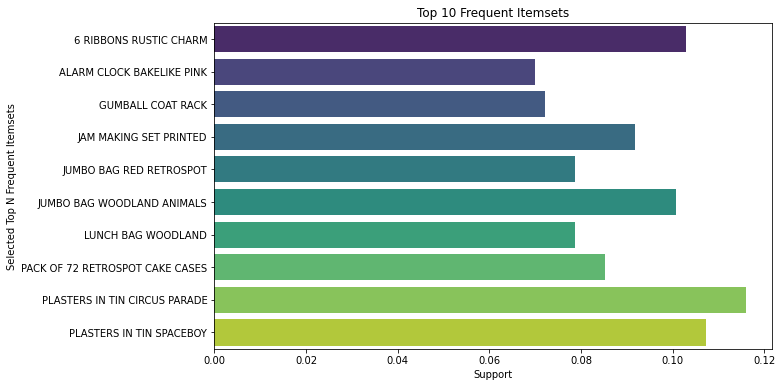

In [50]:


# Assuming my_frequent_items contains the frequent itemsets and mybasket_sets contains the encoded transactions

# Select a subset of frequent itemsets (e.g., top N itemsets)
top_n_itemsets = my_frequent_items.head(10)  # Change 10 to the desired number of itemsets to display

# Extract the selected frequent itemsets and their support values
selected_itemsets = top_n_itemsets['itemsets']
support_values = top_n_itemsets['support']

# Convert frozensets to strings for display
itemset_strings = selected_itemsets.apply(lambda x: ', '.join(list(x)))

# Create a horizontal bar chart for the selected frequent itemsets
plt.figure(figsize=(10, 6))
sns.barplot(x=support_values, y=itemset_strings, palette='viridis')
plt.xlabel('Support')
plt.ylabel('Selected Top N Frequent Itemsets')
plt.title('Top 10 Frequent Itemsets')
plt.show()


In [15]:
mybasket_sets['SPACEBOY LUNCH BOX'].sum()

47

In [80]:
#condition based rules filteration
my_rules[(my_rules['lift'] >= 3) & (my_rules['confidence'] >= 0.3)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,target,Cluster
2,(ROUND SNACK BOXES SET OF 4 FRUITS),(ROUND SNACK BOXES SET OF4 WOODLAND),0.157549,0.245077,0.131291,0.833333,3.400298,0.092679,4.529540,0.837922,1,1
3,(ROUND SNACK BOXES SET OF4 WOODLAND),(ROUND SNACK BOXES SET OF 4 FRUITS),0.245077,0.157549,0.131291,0.535714,3.400298,0.092679,1.814509,0.935072,1,3


**Visualization of Dataset**

<Axes: xlabel='Price', ylabel='Quantity'>

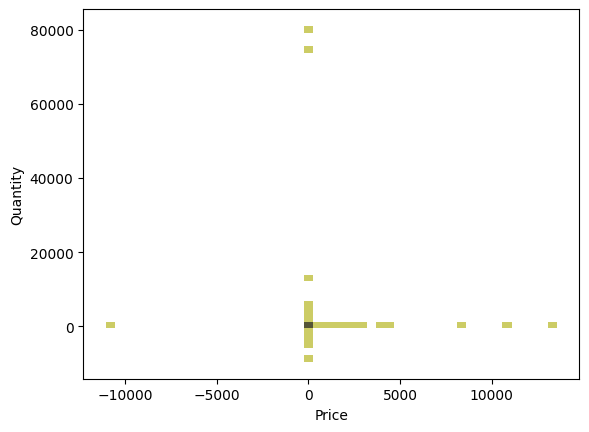

In [ ]:
sns.histplot(dataset, x='Price', y='Quantity', bins=50, color='y')

<Axes: xlabel='Price'>

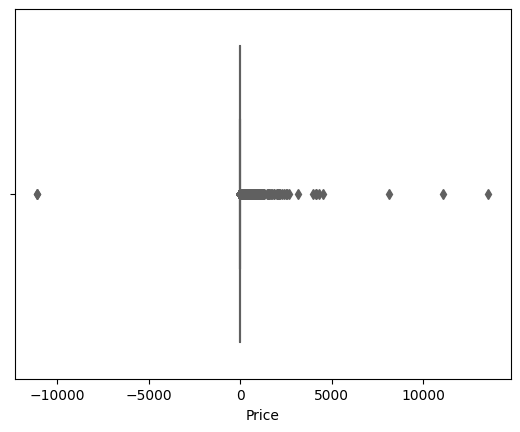

In [ ]:
sns.boxplot(dataset, x='Price',  palette='Blues')

<Figure size 1200x800 with 0 Axes>

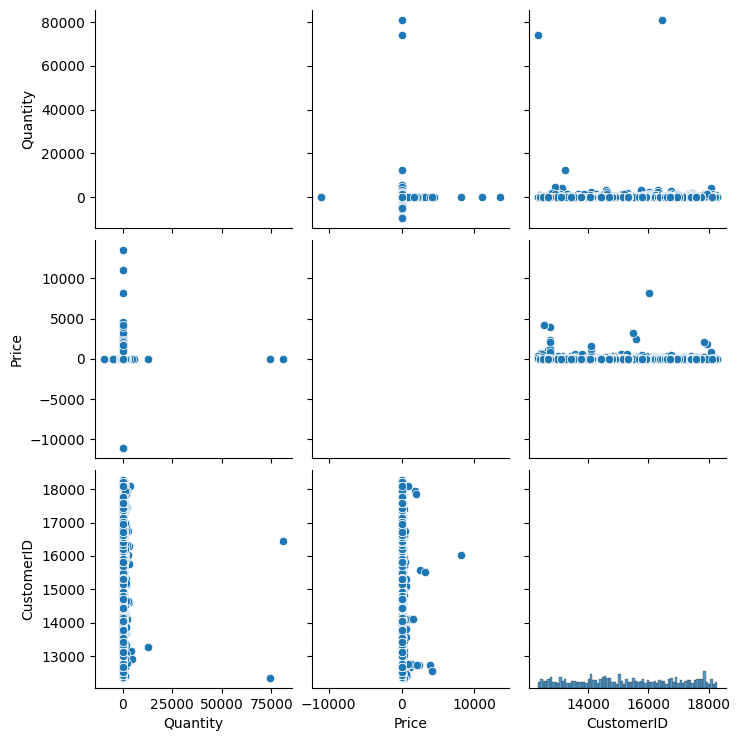

In [ ]:
plt.figure(figsize=(12,8))
sns.pairplot(dataset)

array([[<Axes: title={'center': 'Quantity'}>,
        <Axes: title={'center': 'Date'}>],
       [<Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'CustomerID'}>]], dtype=object)

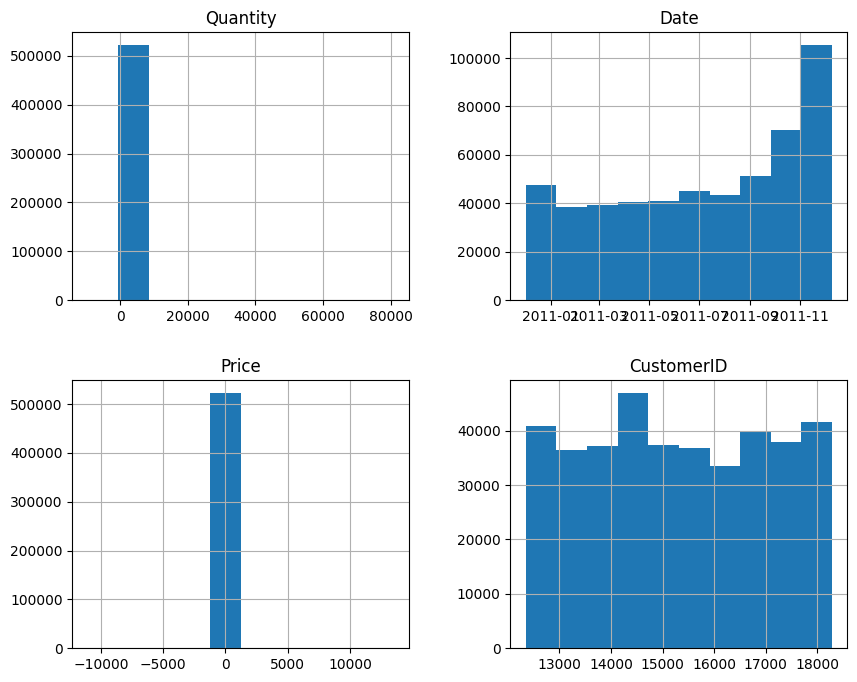

In [ ]:
dataset.hist(figsize=(10,8))

**Visualizing Correlation**

In [ ]:
dataset.corr()

<ipython-input-48-c187c74d1e71>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataset.corr()


,Quantity,Price,CustomerID
Quantity,1.000000,-0.002803,-0.005990
Price,-0.002803,1.000000,-0.010245
CustomerID,-0.005990,-0.010245,1.000000


<ipython-input-49-1afac6b5cf53>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr(), annot=True)


<Axes: >

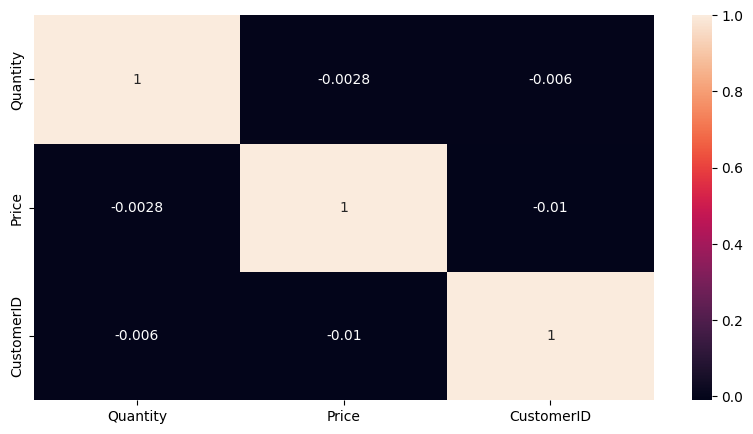

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(dataset.corr(), annot=True)

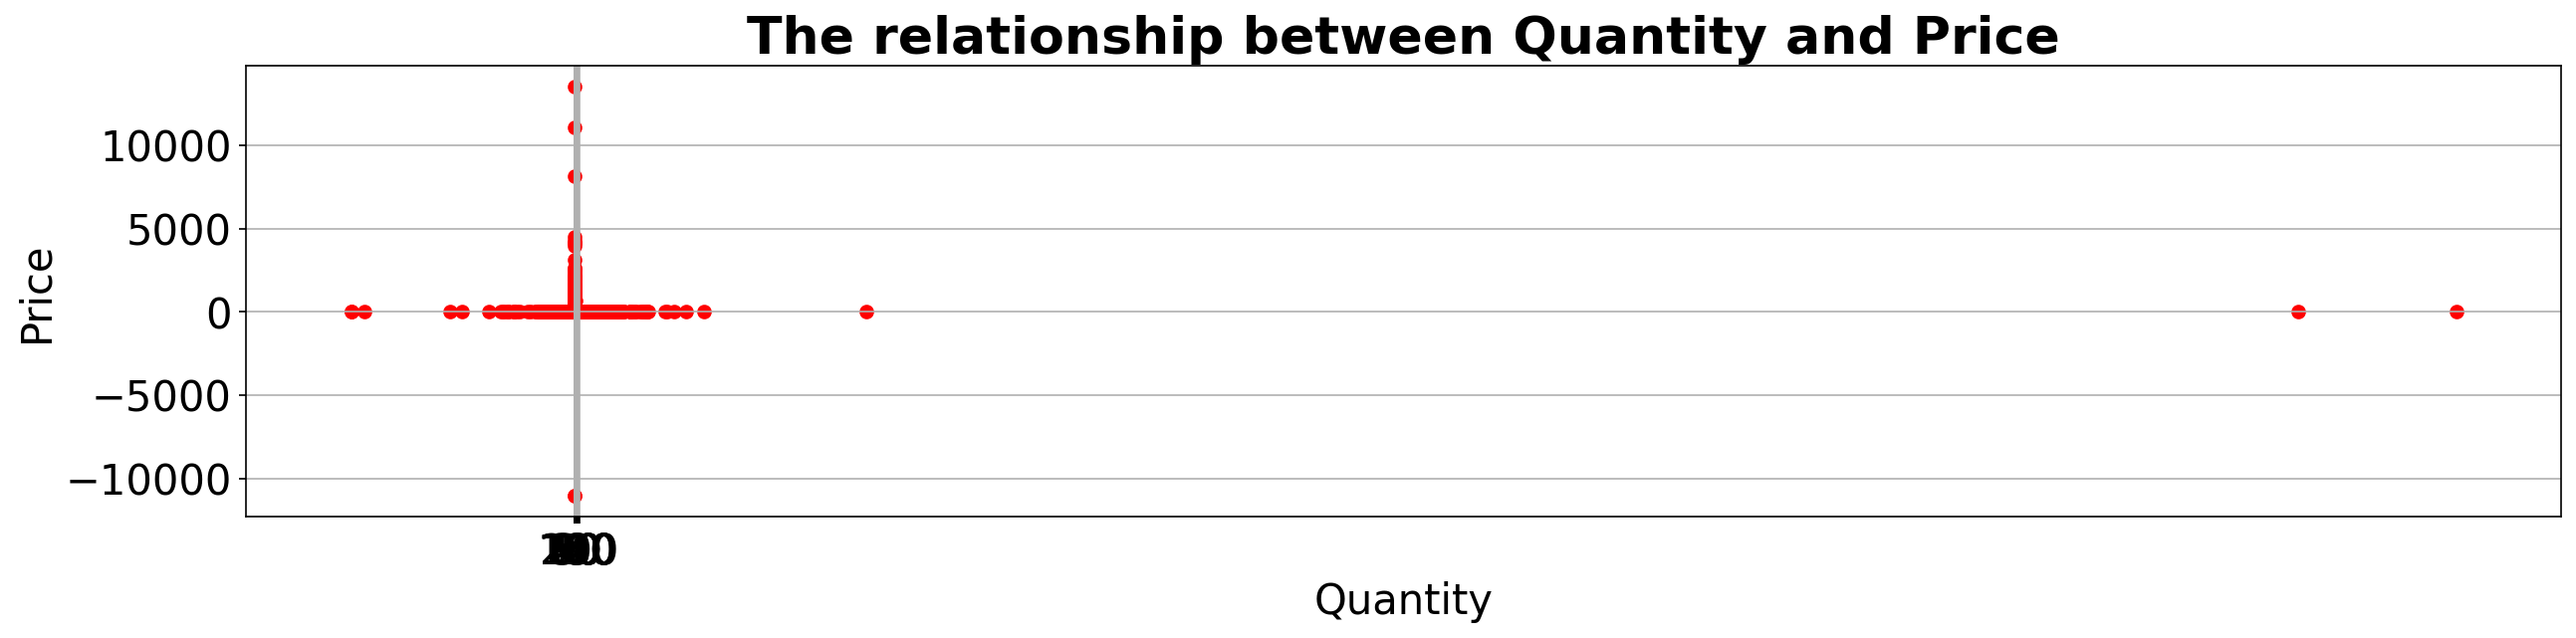

In [17]:
plt.figure(figsize = [20, 4] , dpi = 150)
plt.scatter (dataset["Quantity"] ,dataset["Price"] , color = "red")
plt.title ("The relationship between Quantity and Price" , weight='bold', fontsize = 25)
plt.xticks (range (0 , 205 , 10), fontsize = 20)
plt.yticks (fontsize = 20)
plt.xlabel ('Quantity', fontsize = 20 )
plt.ylabel ('Price' , fontsize = 20)
plt.grid ()
plt.show ()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


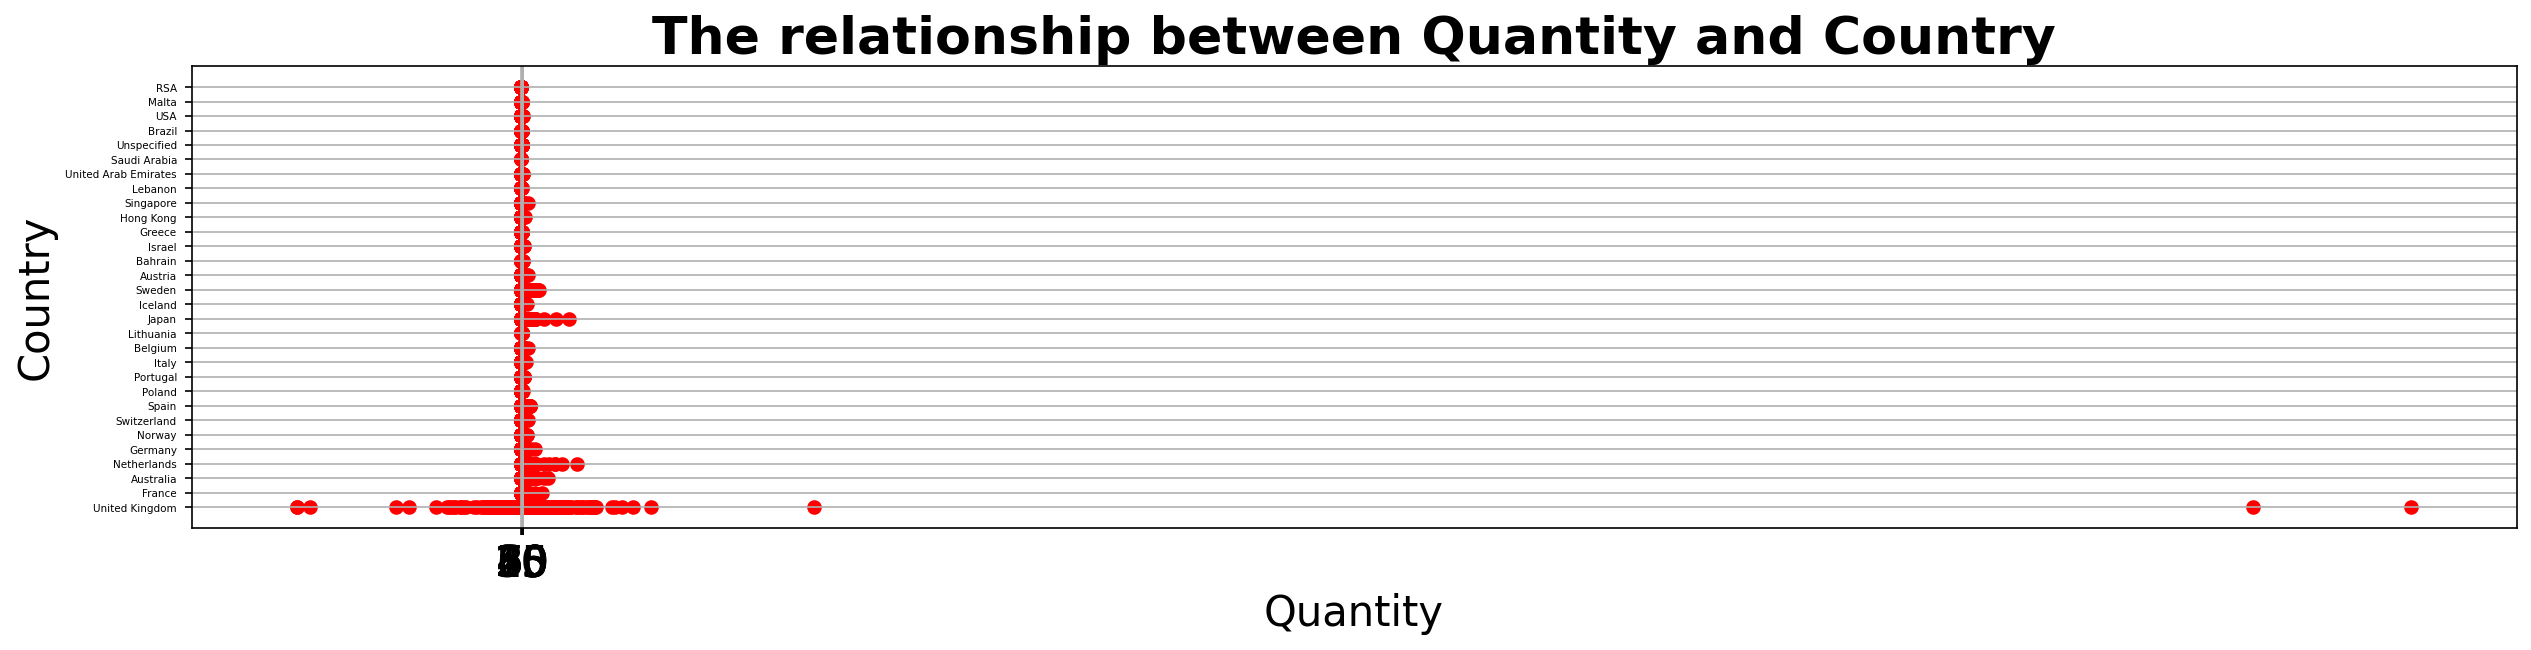

In [ ]:
plt.figure(figsize = [20, 4] , dpi = 150)
plt.scatter (dataset["Quantity"] , dataset["Country"] , color = "red")
plt.title ("The relationship between Quantity and Country" , weight='bold', fontsize = 25)
plt.xticks (range (10 , 85 , 5), fontsize = 20)
plt.yticks (fontsize = 5)
plt.xlabel ('Quantity', fontsize = 20 )
plt.ylabel ('Country' , fontsize = 20)
plt.grid ()
plt.show ()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


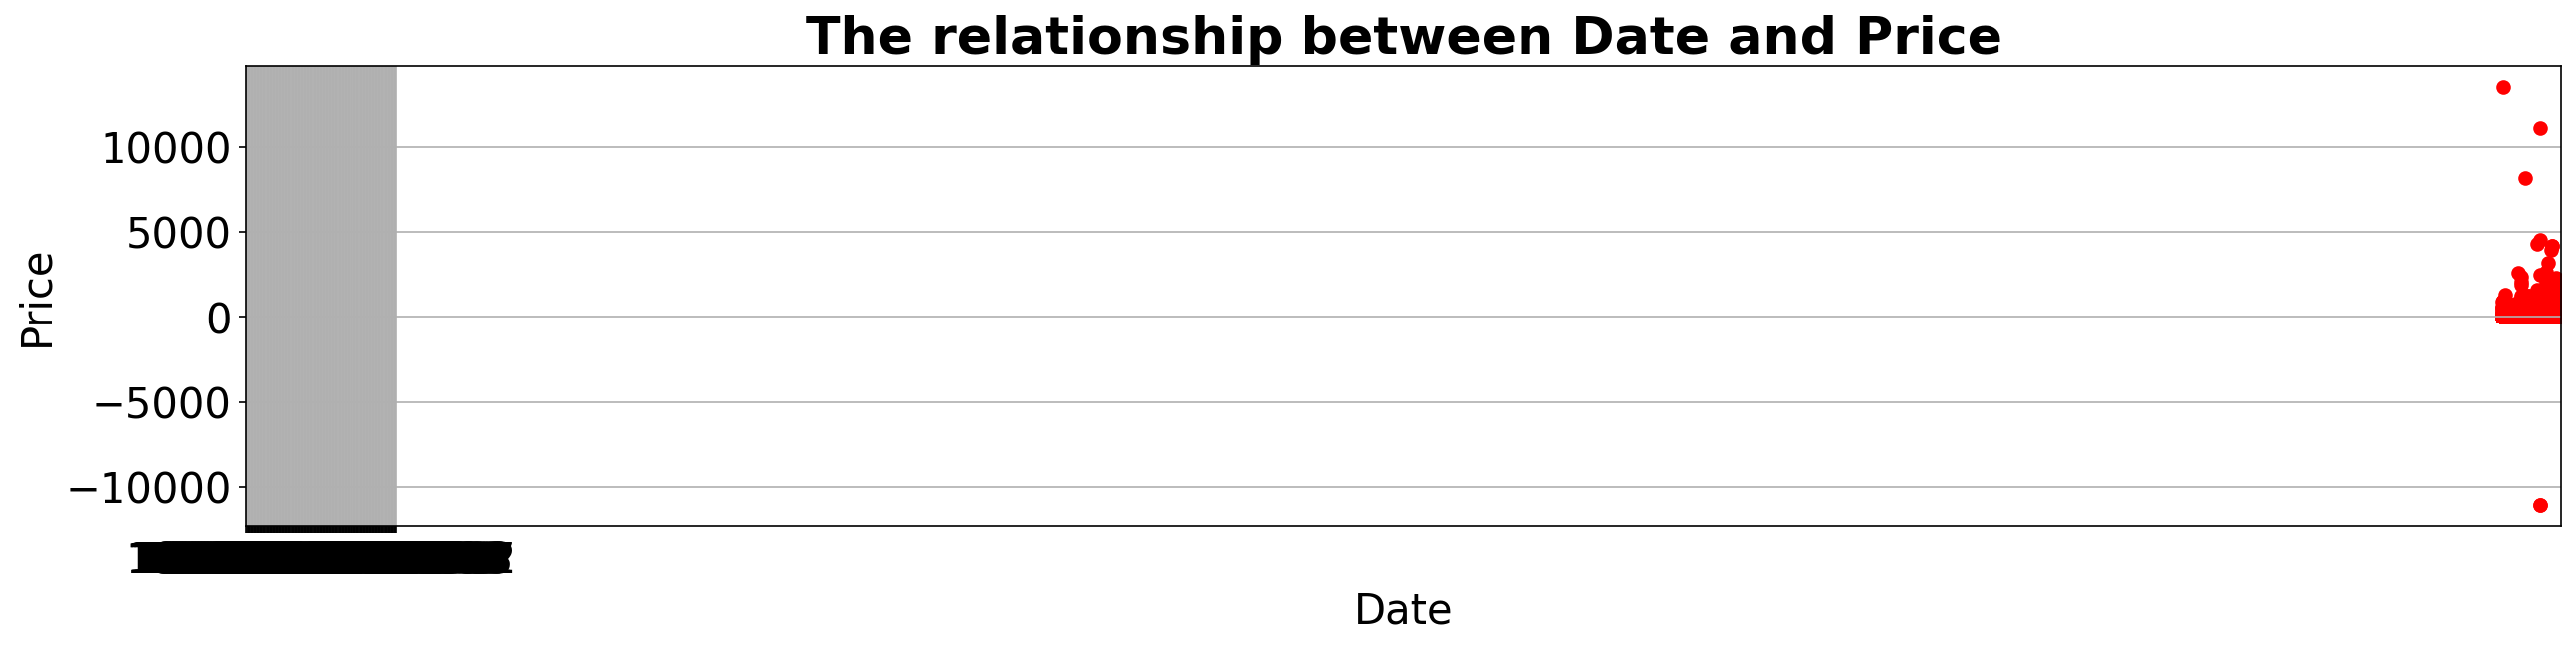

In [ ]:
plt.figure(figsize = [20, 4] , dpi = 150)
plt.scatter (dataset["Date"] , dataset['Price'] , color = "red")
plt.title ("The relationship between Date and Price" , weight = 'bold', fontsize = 25)
plt.xticks (range (0 , 1000 , 5) , fontsize=20)
plt.yticks (fontsize = 20)
plt.xlabel ('Date', fontsize = 20 )
plt.ylabel ('Price' , fontsize = 20)
plt.grid ()
plt.show ()

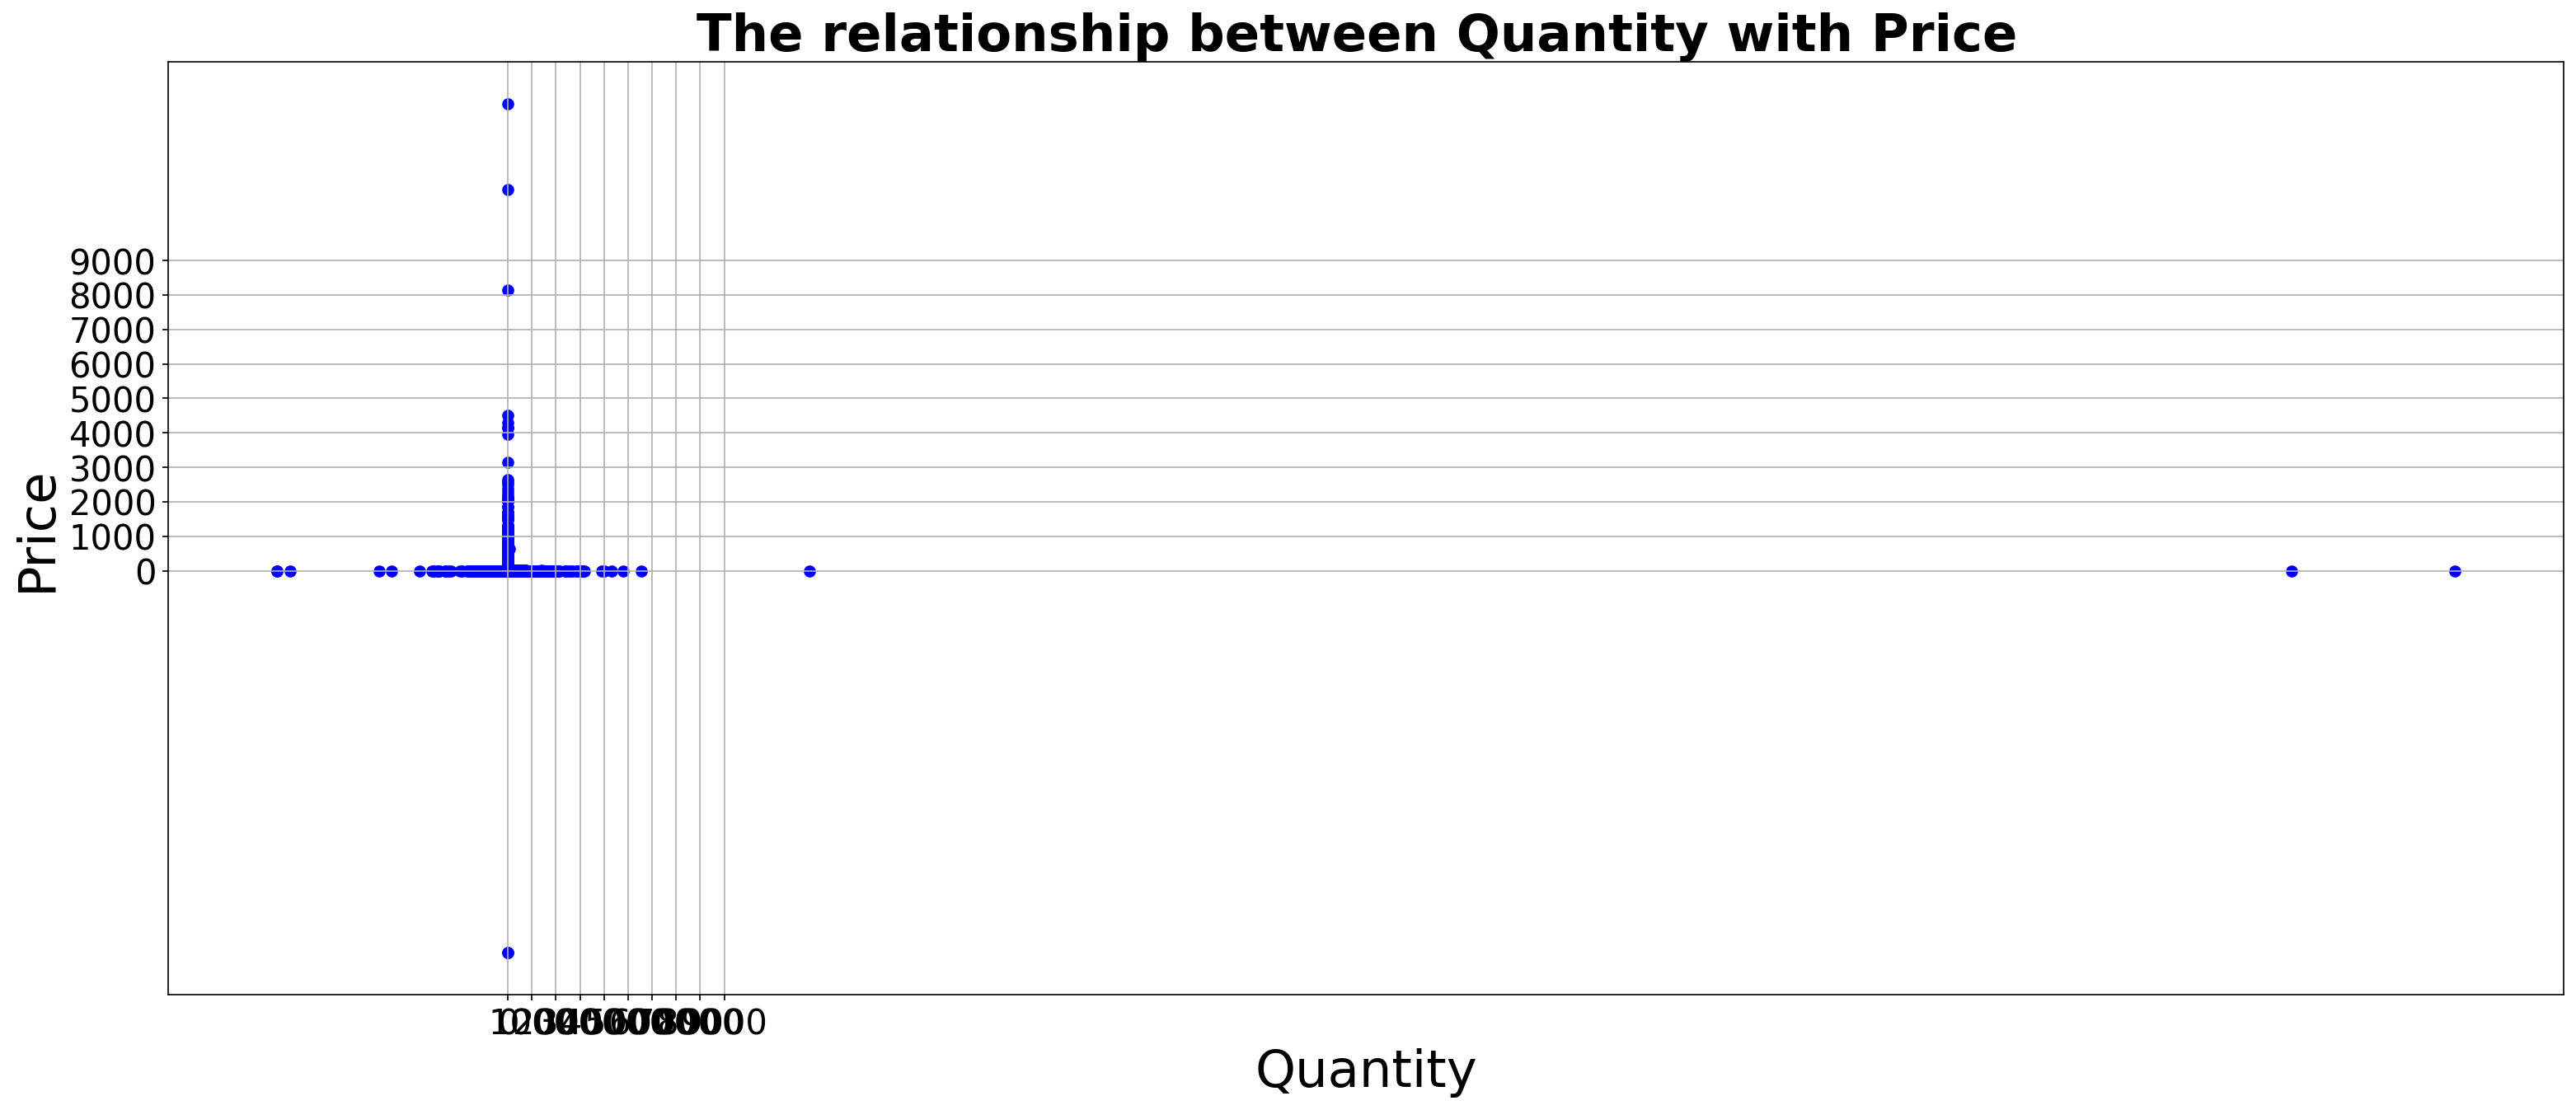

In [18]:
plt.figure(figsize = [25, 10] , dpi = 150)
plt.scatter (dataset["Quantity"] , dataset["Price"] , color = "blue")
plt.title ("The relationship between Quantity with Price " , weight = 'bold', fontsize = 30)
plt.xticks (range (0 , 10000 , 1000) , fontsize = 20)
plt.yticks (range (0 , 10000 , 1000) , fontsize = 20)
plt.xlabel ('Quantity', fontsize = 30 )
plt.ylabel ('Price' , fontsize = 30)
plt.grid ()
plt.show ()

In [19]:
dataset.columns

Index(['BillNo', 'Itemname', 'Quantity', 'Date', 'Price', 'CustomerID',
       'Country', 'Description'],
      dtype='object')

In [ ]:
X = pd.DataFrame(dataset , columns = ['BillNo', 'Itemname', 'Quantity', 'Date', 'Price', 'CustomerID',
       'Country', 'Description'])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print(dataset.columns)


Index(['BillNo', 'Itemname', 'Quantity', 'Date', 'Price', 'CustomerID',
       'Country', 'Description'],
      dtype='object')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
y = dataset['Quantity']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(array([7.80000e+01, 5.21983e+05, 1.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 2.00000e+00]),
 array([-9600. ,  -540.5,  8519. , 17578.5, 26638. , 35697.5, 44757. ,
        53816.5, 62876. , 71935.5, 80995. ]),
 <BarContainer object of 10 artists>)

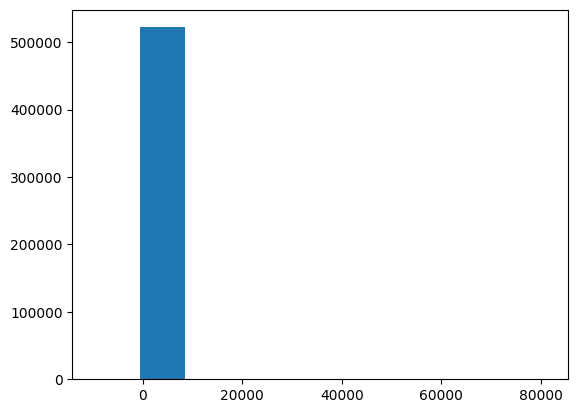

In [ ]:
plt.hist (y)

In [ ]:
# Percentage calculation
((y == 0).sum ()/len (y)) * 100

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.0

**K-MEANS MACHINE LEARNING ALGORITHM**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


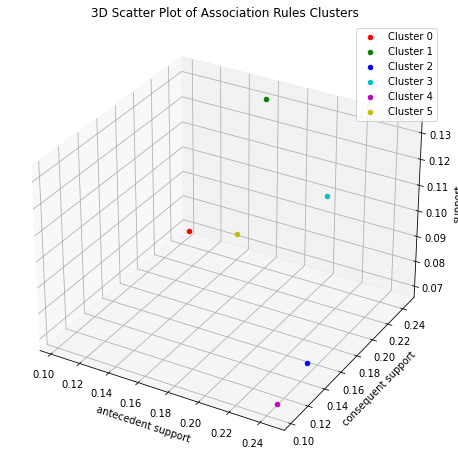

In [79]:

from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans

# Assuming my_rules contains the association rules data with columns like 'antecedents', 'consequents', etc.
# Create a binary target variable based on the 'lift' column (1 for lift > threshold, 0 otherwise)
threshold = 1.2
my_rules['target'] = my_rules['lift'].apply(lambda x: 1 if x > threshold else 0)

# Select features and target variable
features = ['antecedent support', 'consequent support', 'support', 'confidence', 'lift', 'leverage', 'conviction', 'zhangs_metric']
x = my_rules[features]
y = my_rules['target']

# Cluster the association rules using KMeans
n_clusters = 6
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
my_rules['Cluster'] = kmeans.fit_predict(x)

# Create a 3D scatter plot for the clustered data
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']
for cluster, color in zip(range(n_clusters), colors):
    cluster_data = my_rules[my_rules['Cluster'] == cluster]
    ax.scatter(cluster_data[features[0]], cluster_data[features[1]], cluster_data[features[2]], c=color, label=f'Cluster {cluster}')

ax.set_xlabel(features[0])
ax.set_ylabel(features[1])
ax.set_zlabel(features[2])
plt.legend()
plt.title("3D Scatter Plot of Association Rules Clusters")
plt.show()
